In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import numpy as np

# Population
PopData = "../Resources/population.csv"

# Country Catalog
onu_df = "../Resources/onu.csv"

# Output Pop
OutPutData = "../Resources/pop.csv"

In [2]:
PopDataDf = pd.read_csv(PopData)
onu_df = pd.read_csv(onu_df)

In [3]:
onu_df.columns

Index(['Country', 'Date of Admission'], dtype='object')

In [4]:
# PopDataDf["Country Name"] = PopDataDf["Country Name"].str.lower() 
onu_df['Country'] = onu_df['Country'].str.lower() 

In [5]:
PopDataDf.rename(columns={'Country Name':'Country'}, inplace=True)
PopDataDf['Country'] = PopDataDf['Country'].str.lower() 
# PopDataDf['Country'] = PopDataDf['Country'].str.replace(r"\s+\(.*\)","")
# PopDataDf['Country'] = PopDataDf['Country'].str.replace(r"&","and")

In [6]:
# #Clean and standarize country names:
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"plurinational state of bolivia","bolivia")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"brunei","brunei darussalam")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"republic of cameroon","cameroon")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"guinea bissau","guinea-bissau")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"islamic republic of iran","iran")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"libyan arab jamahiriyah","libya")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"st. kitts-nevis","saint kitts and nevis")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"st. vincent and the grenadines","saint vincent and the grenadines")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"republic of south sudan","south sudan")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"syrian arab republic","syria")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"macedonia","the former yugoslav republic of macedonia")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"timor-leste","timor leste")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"united states of america","united states")
PopDataDf['Country']  = PopDataDf['Country'] .str.replace(r"venezuela, rb","venezuela")

In [7]:
PopDataDf

,Country,Country Code,Indicator Name,Indicator Code,POP1960,POP1961,POP1962,POP1963,POP1964,POP1965,...,POP2008,POP2009,POP2010,POP2011,POP2012,POP2013,POP2014,POP2015,POP2016,POP2017
0,aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.131311,0.098616,0.212680,0.376985,0.512145,0.592914,0.587492,0.524658,0.459929,0.420781
1,afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1.816077,1.876528,1.934999,1.992521,2.049423,2.105369,...,2.512574,2.569114,2.812617,3.095119,3.272703,3.315224,3.183201,2.943234,2.689163,2.490790
2,angola,AGO,Population growth (annual %),SP.POP.GROW,1.903517,1.927754,1.945774,1.930693,1.870296,1.788799,...,3.563448,3.566821,3.570099,3.570352,3.559496,3.531824,3.485413,3.428021,3.367572,3.313507
3,albania,ALB,Population growth (annual %),SP.POP.GROW,3.015423,3.120855,3.056731,2.953749,2.880686,2.754021,...,-0.767343,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972
4,andorra,AND,Population growth (annual %),SP.POP.GROW,7.050663,6.941532,6.692697,6.559522,6.241511,5.998800,...,1.414665,0.714106,-0.015393,-0.829969,-1.588653,-2.013314,-1.956178,-1.537836,-0.944017,-0.409736
5,arab world,ARB,Population growth (annual %),SP.POP.GROW,NaN,2.760881,2.775328,2.793528,2.817245,2.842976,...,2.463921,2.448201,2.402393,2.352527,2.305073,2.248844,2.185197,2.118210,2.045601,1.977892
6,united arab emirates,ARE,Population growth (annual %),SP.POP.GROW,5.859584,8.723625,10.681181,11.012721,9.824817,8.196603,...,13.161466,10.615444,7.587098,4.743700,2.594796,1.181805,0.714763,0.915608,1.251759,1.398359
7,argentina,ARG,Population growth (annual %),SP.POP.GROW,1.630874,1.606889,1.584309,1.557532,1.524221,1.489544,...,1.025900,1.027377,1.035037,1.044860,1.050376,1.047277,1.032709,1.009855,0.984742,0.961465
8,armenia,ARM,Population growth (annual %),SP.POP.GROW,3.596386,3.531702,3.444264,3.330247,3.193727,3.044919,...,-0.850367,-0.677479,-0.391024,-0.060144,0.220269,0.401252,0.438332,0.368528,0.269302,0.192442
9,american samoa,ASM,Population growth (annual %),SP.POP.GROW,1.403903,2.335966,3.033668,3.558598,3.661243,3.557431,...,-1.519175,-1.418038,-1.054862,-0.571394,-0.162822,0.139320,0.234776,0.180222,0.111575,0.075512


In [8]:
# World BAnk Source
# https://data.worldbank.org/indicator/SP.POP.GROW

# PopDataDf['Country'] = PopDataDf['Country'].str.lower() 
PopDataDf.drop(PopDataDf.columns[[-1, -2, -3, -4]], axis=1, inplace=True)
PopDataDf.set_index('Country')

SortDf = pd.wide_to_long(PopDataDf, ["POP"], i='Country', j="year")
SortDf


,,Indicator Name,Country Code,Indicator Code,POP
Country,year,,,,
aruba,1960,Population growth (annual %),ABW,SP.POP.GROW,3.148037
afghanistan,1960,Population growth (annual %),AFG,SP.POP.GROW,1.816077
angola,1960,Population growth (annual %),AGO,SP.POP.GROW,1.903517
albania,1960,Population growth (annual %),ALB,SP.POP.GROW,3.015423
andorra,1960,Population growth (annual %),AND,SP.POP.GROW,7.050663
arab world,1960,Population growth (annual %),ARB,SP.POP.GROW,NaN
united arab emirates,1960,Population growth (annual %),ARE,SP.POP.GROW,5.859584
argentina,1960,Population growth (annual %),ARG,SP.POP.GROW,1.630874
armenia,1960,Population growth (annual %),ARM,SP.POP.GROW,3.596386


In [9]:
#Clean 'Country' column from () [] etc:
onu_df['Country'] = onu_df['Country'].str.lower()
onu_df['Country'] = onu_df['Country'].str.replace(r"\s+\(.*\)","")
onu_df['Country'] = onu_df['Country'].str.replace(r"\s+\[.*\]","")
onu_df['Country'] = onu_df['Country'].str.replace(r"\[.*\]","")

#Clean and standarize these countries:
onu_df['Country'] = onu_df['Country'].str.replace(r"cÃ´te dâ€™ivoire","cote d ivoire")
onu_df['Country'] = onu_df['Country'].str.replace(r"democratic peopleâ€™s republic of korea","democratic people s republic of korea")
onu_df['Country'] = onu_df['Country'].str.replace(r"lao peopleâ€™s democratic republic","lao people s democratic republic")
onu_df['Country'] = onu_df['Country'].str.replace(r"united of republic of tanzania","united republic of tanzania")

In [10]:

# SortDf = pd.wide_to_long(PopDataDf, ["POP"], i="Country", j="year")
# SortDf


In [11]:
SortDf.to_csv(OutPutData, encoding='utf-8', index=True)
SortDf = SortDf.reset_index()


Which country do you need to analyze? : venezuela


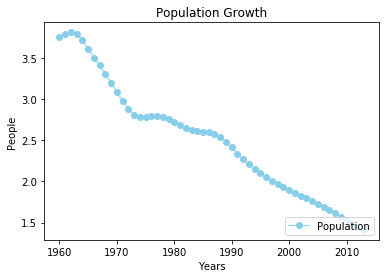

In [12]:
Sel = input ("Which country do you need to analyze? : ").lower()

CountPlt = SortDf[SortDf['Country'] == Sel]

plt.plot(CountPlt['year'], CountPlt['POP'], marker ='o', color='SkyBlue', label="Population", linestyle='solid', linewidth=1, markersize=6)
plt.legend(loc="lower right")
plt.title("Population Growth")
plt.xlabel("Years")
plt.ylabel("People")

plt.show()